# **Task 1**

In [1231]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd



In [1232]:
def show(X,y):
    plt.figure(figsize = (30,7))
    plt.scatter(X, y)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

In [1233]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 2))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

In [1234]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [1235]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [1236]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred

In [1237]:
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float 
        ))
        self.bias = nn.Parameter(torch.randn(1, 
            requires_grad=True,
            dtype=torch.float 
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias 
        return y

In [1238]:
class polynomial_second(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weight1 = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float 
        ))
        self.weight2 = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float 
        ))
        self.bias = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float 
        ))
    def forward(self, x: torch.Tensor):
        y = (x **2)* self.weight1 + x*self.weight2+self.bias  
        return y

In [1239]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


# **Model 1 (polynomial regression)**

In [1240]:
data_copy = data.copy()
X = data_copy['x1']
y = data_copy['y']

In [1241]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]
X_test=torch.tensor(X_test.to_numpy())
y_test=torch.tensor(y_test.to_numpy())
X_train=torch.tensor(X_train.to_numpy())
y_train=torch.tensor(y_train.to_numpy())

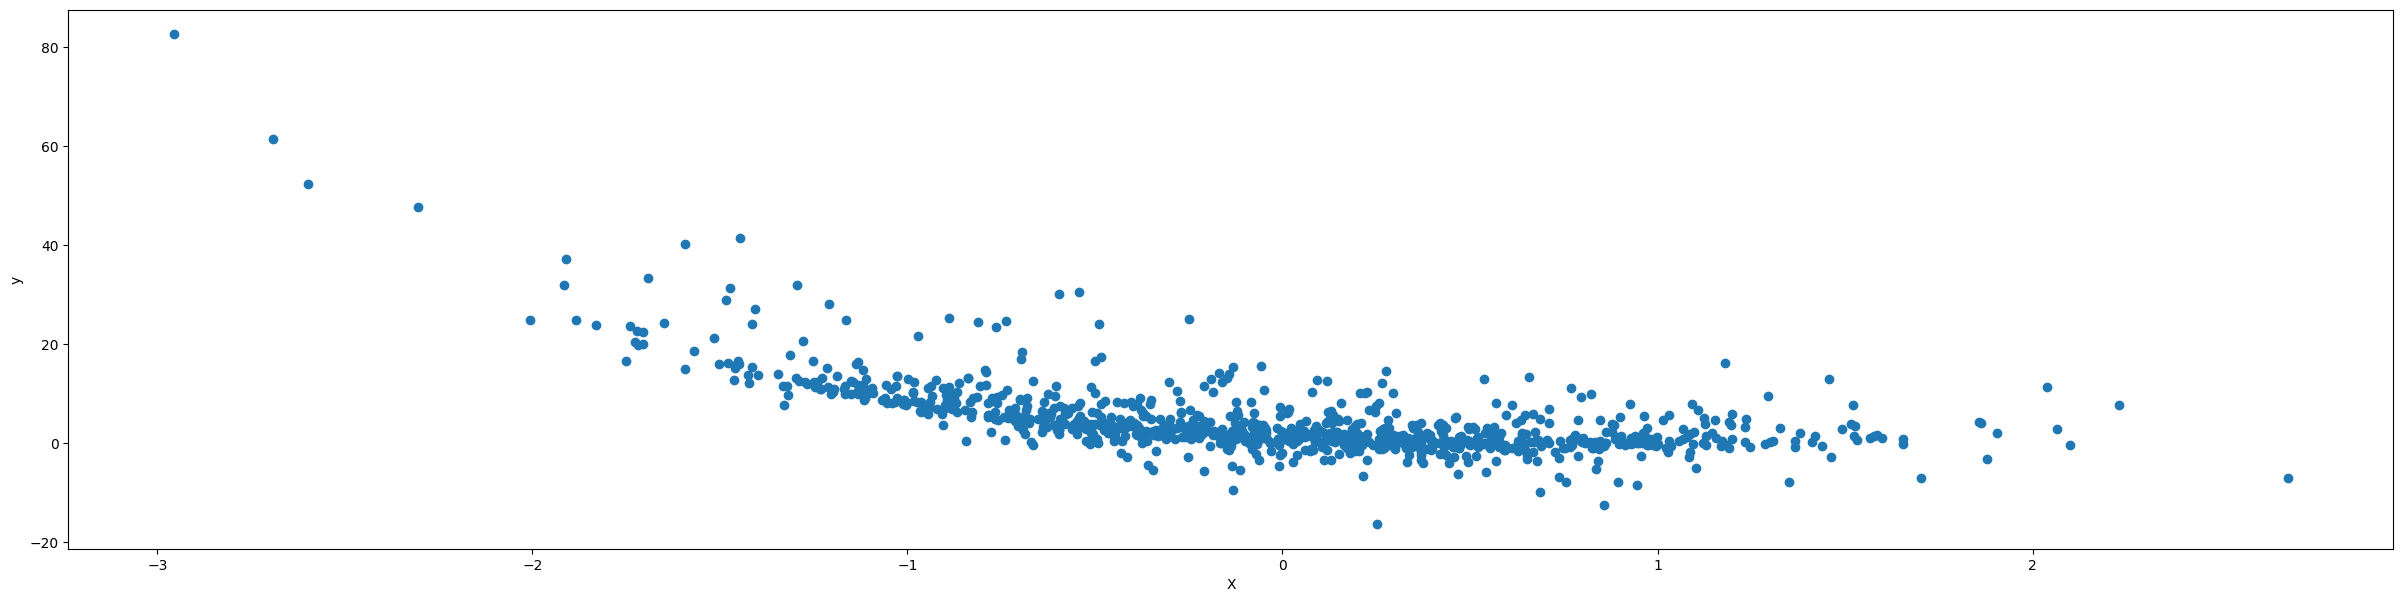

In [1242]:
show(X,y)

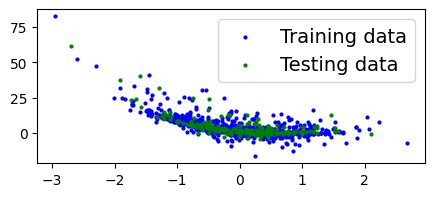

In [1243]:
plot_predictions(X_train, y_train, X_test,y_test)

In [1244]:
model1=polynomial_second()
print(f"Model_1 Parameters: {list(model1.parameters())}")
print("---------")
print(f"Named Parameters: {model1.state_dict()}")

Model_1 Parameters: [Parameter containing:
tensor([-2.6389], requires_grad=True), Parameter containing:
tensor([-0.6422], requires_grad=True), Parameter containing:
tensor([0.9126], requires_grad=True)]
---------
Named Parameters: OrderedDict([('weight1', tensor([-2.6389])), ('weight2', tensor([-0.6422])), ('bias', tensor([0.9126]))])


In [1245]:

y_preds=predict(model1,X_test)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([ 7.1744e-01, -5.2115e+00,  4.9005e-01,  9.2023e-01,  9.1072e-01,
         9.0728e-01,  1.3893e-01, -3.8987e+00,  7.4992e-01,  3.3495e-01,
        -5.6357e+00,  7.9624e-01,  7.6952e-01, -1.1954e+00, -1.8469e+00,
        -7.9899e-01,  6.2551e-01, -9.2215e-02, -2.3445e+00, -6.4990e-01,
         2.1991e-02,  9.0416e-01,  5.7018e-01, -1.3370e-01,  7.1671e-01,
         1.2952e-01, -1.8652e-02,  9.1535e-01,  7.8523e-01, -1.0073e+00,
         6.9741e-01,  7.2289e-01,  4.5059e-01, -2.3541e+00,  2.7320e-01,
         8.9745e-01, -1.6027e+00, -3.8913e+00, -3.1796e+00,  6.7200e-01,
        -1.5460e+00,  2.0791e-02,  3.4783e-01, -1.4551e-01,  4.8163e-01,
         9.5130e-01,  4.9292e-01, -1.4680e-01,  3.7533e-01,  6.1981e-01,
         9.0639e-01, -2.1711e+00,  2.6389e-01,  6.5161e-01, -2.1422e-01,
        -1.6645e+00, -4.8830e-02, -4.7609e+00,  5.1442e-01, -9.2046e-01,
         9.1390e-01,  1.5320e-01,  7.5946e-01,  9.0944e-01, -7.7039e-01,
         8.6835e-01,  3.6796e-01, 

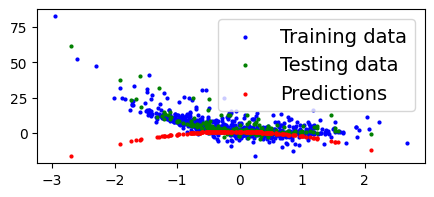

In [1246]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [1247]:

print(f"Loss in one parameter before training: {y_preds[0] - y_test[0]}")

Loss in one parameter before training: -2.608187424744557


In [1248]:
loss_function = nn.L1Loss()

In [1249]:
optimizer = optim.SGD(model1.parameters(), lr=0.001)

In [1250]:
# X_train = torch.tensor(X_train)
# y_train=torch.tensor(y_train)
epochs_count, train_loss, test_loss = train( model1,X_train,y_train,X_test,y_test,loss_function,optimizer,  epochs=3000)

Epoch 0: MAE Loss: 5.72 | Test Loss: 5.32
Epoch 10: MAE Loss: 5.72 | Test Loss: 5.32
Epoch 20: MAE Loss: 5.71 | Test Loss: 5.31
Epoch 30: MAE Loss: 5.70 | Test Loss: 5.30
Epoch 40: MAE Loss: 5.70 | Test Loss: 5.30
Epoch 50: MAE Loss: 5.69 | Test Loss: 5.29
Epoch 60: MAE Loss: 5.68 | Test Loss: 5.29
Epoch 70: MAE Loss: 5.68 | Test Loss: 5.28
Epoch 80: MAE Loss: 5.67 | Test Loss: 5.27
Epoch 90: MAE Loss: 5.66 | Test Loss: 5.27
Epoch 100: MAE Loss: 5.66 | Test Loss: 5.26
Epoch 110: MAE Loss: 5.65 | Test Loss: 5.26
Epoch 120: MAE Loss: 5.65 | Test Loss: 5.25
Epoch 130: MAE Loss: 5.64 | Test Loss: 5.25
Epoch 140: MAE Loss: 5.63 | Test Loss: 5.24
Epoch 150: MAE Loss: 5.63 | Test Loss: 5.23
Epoch 160: MAE Loss: 5.62 | Test Loss: 5.23
Epoch 170: MAE Loss: 5.61 | Test Loss: 5.22
Epoch 180: MAE Loss: 5.61 | Test Loss: 5.22
Epoch 190: MAE Loss: 5.60 | Test Loss: 5.21
Epoch 200: MAE Loss: 5.60 | Test Loss: 5.20
Epoch 210: MAE Loss: 5.59 | Test Loss: 5.20
Epoch 220: MAE Loss: 5.58 | Test Loss: 5.19

Epoch 620: MAE Loss: 5.36 | Test Loss: 4.98
Epoch 630: MAE Loss: 5.35 | Test Loss: 4.98
Epoch 640: MAE Loss: 5.35 | Test Loss: 4.97
Epoch 650: MAE Loss: 5.34 | Test Loss: 4.97
Epoch 660: MAE Loss: 5.34 | Test Loss: 4.96
Epoch 670: MAE Loss: 5.33 | Test Loss: 4.96
Epoch 680: MAE Loss: 5.33 | Test Loss: 4.95
Epoch 690: MAE Loss: 5.32 | Test Loss: 4.95
Epoch 700: MAE Loss: 5.32 | Test Loss: 4.94
Epoch 710: MAE Loss: 5.31 | Test Loss: 4.94
Epoch 720: MAE Loss: 5.31 | Test Loss: 4.93
Epoch 730: MAE Loss: 5.30 | Test Loss: 4.93
Epoch 740: MAE Loss: 5.30 | Test Loss: 4.92
Epoch 750: MAE Loss: 5.29 | Test Loss: 4.92
Epoch 760: MAE Loss: 5.29 | Test Loss: 4.91
Epoch 770: MAE Loss: 5.28 | Test Loss: 4.91
Epoch 780: MAE Loss: 5.28 | Test Loss: 4.90
Epoch 790: MAE Loss: 5.27 | Test Loss: 4.90
Epoch 800: MAE Loss: 5.27 | Test Loss: 4.89
Epoch 810: MAE Loss: 5.26 | Test Loss: 4.89
Epoch 820: MAE Loss: 5.26 | Test Loss: 4.89
Epoch 830: MAE Loss: 5.25 | Test Loss: 4.88
Epoch 840: MAE Loss: 5.25 | Test

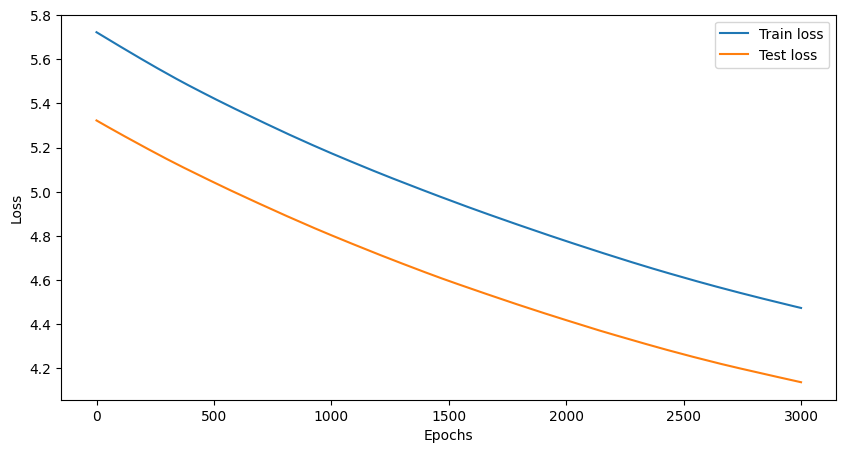

In [1251]:
plot_stats(epochs_count, train_loss, test_loss)

In [1252]:
y_preds = predict(model1, X_test)

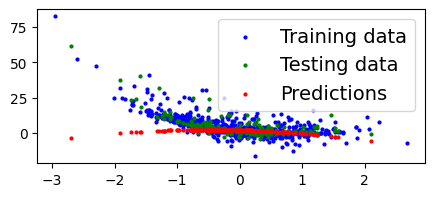

In [1253]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [1254]:
print(f"Loss in one parameter after training: {y_preds[0] - y_test[0]}")

Loss in one parameter after training: -0.9537349880412158


In [1255]:
print (y_preds)

tensor([ 2.3719,  0.6605,  2.3709,  2.1077,  2.0895,  2.3127,  1.3444, -1.2704,
         1.8792,  1.5002, -2.2889,  1.9310,  2.3654,  0.4074,  1.8084,  0.6720,
         1.7541,  1.1698, -0.3259,  2.1518,  1.2551,  2.0779,  1.7026,  1.1393,
         2.3720,  1.3371,  2.2971,  2.3056,  1.9183,  2.0561,  1.8244,  1.8506,
         1.5970, -0.3319,  2.3471,  2.0666,  0.1427, -1.2659, -0.8383,  1.7990,
         1.9001,  1.2542,  1.5108,  2.2712,  1.6238,  2.2086,  2.3711,  2.2710,
         1.5335,  2.3759,  2.3135, -0.2177,  2.3458,  2.3756,  2.2564,  1.8643,
         2.2912,  0.8229,  2.3726,  2.0800,  2.0954,  2.3285,  2.3669,  2.0872,
         0.6914,  2.3368,  2.3593,  1.5605,  1.8315,  2.2739,  2.2923,  1.8736,
         1.8083,  1.9122,  1.4355,  1.9955,  2.3757,  2.3149,  1.9468,  2.3134,
         1.6970,  1.6723, -1.0890,  2.1600, -2.6172,  2.1513,  1.7220,  2.1518,
         2.0577,  2.2601,  2.2420,  2.2349,  0.9612, -1.2806,  2.3757,  2.3157,
         1.6983,  1.6204,  2.3385,  1.74

In [1256]:
model1.state_dict()

OrderedDict([('weight1', tensor([-1.2461])),
             ('weight2', tensor([-1.1877])),
             ('bias', tensor([2.0929]))])

# **Model 2(polynomial regression)**

In [1257]:
data_copy = data.copy()
X = data_copy['x2']
y = data_copy['y']

In [1258]:

X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]
X_test=torch.tensor(X_test.to_numpy())
y_test=torch.tensor(y_test.to_numpy())
X_train=torch.tensor(X_train.to_numpy())
y_train=torch.tensor(y_train.to_numpy())


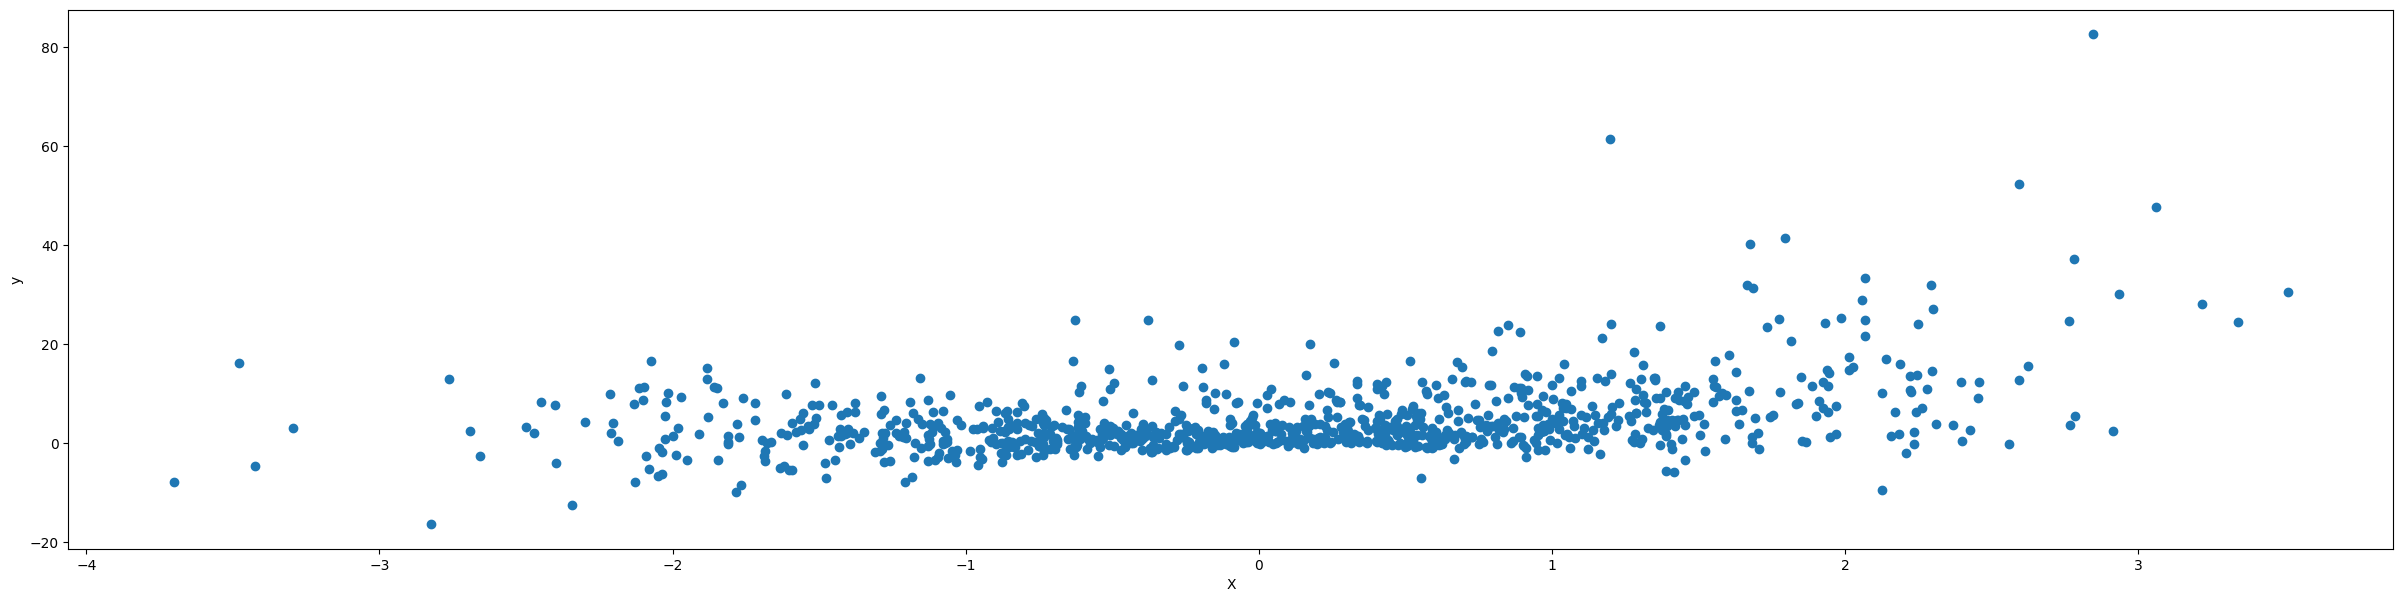

In [1259]:
show(X,y)

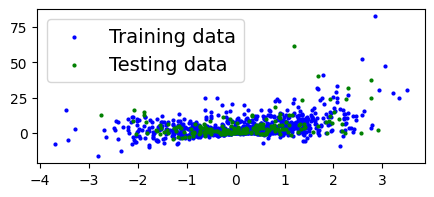

In [1260]:
plot_predictions(X_train, y_train, X_test,y_test)

In [1261]:
model2=polynomial_second()


In [1262]:
# X_test=torch.tensor(X_test)
y_preds=predict(model2,X_test)
print (f"loss in one parameter before training {y_preds[0]-y_test[0]}")

loss in one parameter before training -2.3683755757235336


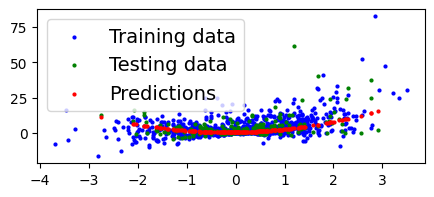

In [1263]:
plot_predictions(X_train, y_train, X_test,y_test,y_preds)

In [1264]:
optimizer=optim.SGD(model2.parameters(),lr=0.001)

In [1265]:
epochs_count,train_loss,test_loss=train(model2,X_train,y_train,X_test,y_test,loss_function,optimizer,epochs=900)

Epoch 0: MAE Loss: 4.22 | Test Loss: 3.77
Epoch 10: MAE Loss: 4.22 | Test Loss: 3.77
Epoch 20: MAE Loss: 4.22 | Test Loss: 3.77
Epoch 30: MAE Loss: 4.22 | Test Loss: 3.77
Epoch 40: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 50: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 60: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 70: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 80: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 90: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 100: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 110: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 120: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 130: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 140: MAE Loss: 4.21 | Test Loss: 3.76
Epoch 150: MAE Loss: 4.20 | Test Loss: 3.76
Epoch 160: MAE Loss: 4.20 | Test Loss: 3.76
Epoch 170: MAE Loss: 4.20 | Test Loss: 3.76
Epoch 180: MAE Loss: 4.20 | Test Loss: 3.76
Epoch 190: MAE Loss: 4.20 | Test Loss: 3.76
Epoch 200: MAE Loss: 4.20 | Test Loss: 3.76
Epoch 210: MAE Loss: 4.20 | Test Loss: 3.75
Epoch 220: MAE Loss: 4.20 | Test Loss: 3.75

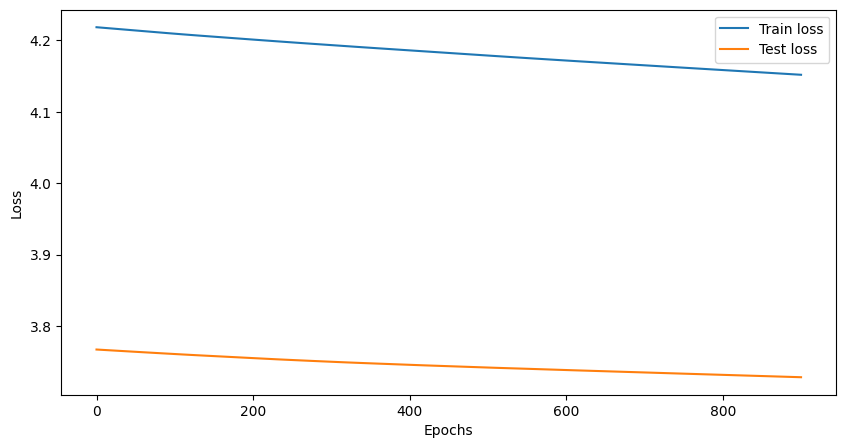

In [1266]:
plot_stats(epochs_count,train_loss,test_loss)

In [1267]:
y_preds=predict(model2,X_test)


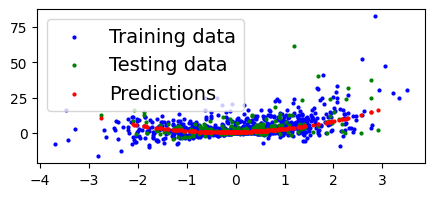

In [1268]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [1269]:
print (f"loss in one parameter after train{y_preds[0]-y_test[0]}")

loss in one parameter after train-2.178732424757693


# **Model 3 (polynomial regression)**

In [1270]:
data_copy = data.copy()
X = data_copy['x3']
y = data_copy['y']

In [1271]:
print(X)

0      0.867185
1      0.353789
2      0.284455
3      0.472880
4      0.014656
         ...   
995   -0.285002
996   -0.029521
997   -0.723684
998   -1.654938
999    0.735014
Name: x3, Length: 1000, dtype: float64


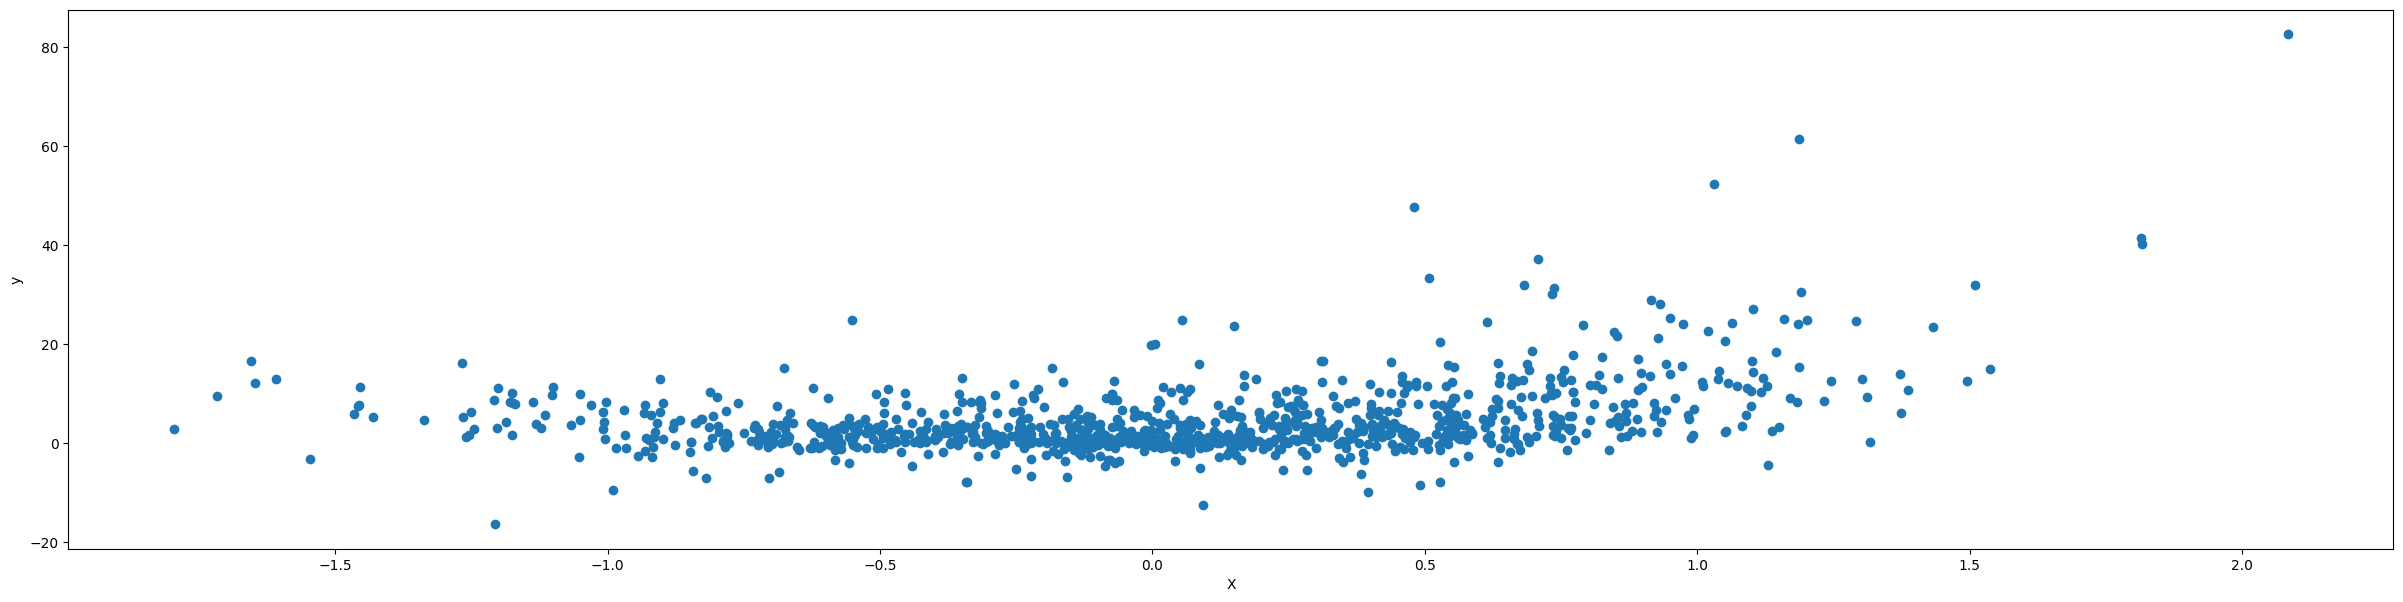

In [1272]:
show(X,y)

In [1273]:

X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]
X_test=torch.tensor(X_test.to_numpy())
y_test=torch.tensor(y_test.to_numpy())
X_train=torch.tensor(X_train.to_numpy())
y_train=torch.tensor(y_train.to_numpy())

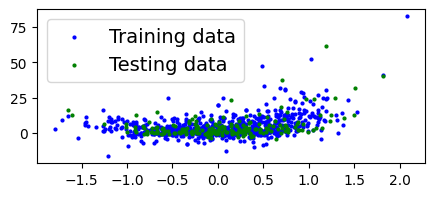

In [1274]:
plot_predictions(X_train,y_train, X_test, y_test)

In [1275]:
model3 = polynomial_second()


In [1276]:

# X_test = torch.tensor(X_test.to_numpy())
y_preds=predict(model3,X_test)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([ 0.5799, -0.1947,  0.2509,  0.5675,  0.5302,  0.5388,  0.3575,  0.5536,
         0.0378,  0.0213, -0.8493, -0.2534,  0.5792,  0.5644, -0.4684,  0.5963,
        -0.0355,  0.2612,  0.5974,  0.5615,  0.4365,  0.4895,  0.3078,  0.5812,
         0.2212,  0.3589,  0.3534,  0.4496,  0.5974,  0.5805,  0.4886,  0.4189,
         0.5701,  0.5945,  0.5697,  0.5943,  0.4001,  0.5251,  0.4277,  0.1789,
         0.5880,  0.4951,  0.3769,  0.5769,  0.5941,  0.4184,  0.4830,  0.3136,
         0.3690,  0.3782,  0.5176,  0.5974,  0.5959,  0.4238,  0.5230,  0.1762,
        -0.5451, -1.5944,  0.0748,  0.5395,  0.4684,  0.5469,  0.5943,  0.5214,
         0.2384,  0.5928,  0.4939,  0.2898,  0.5967,  0.1747,  0.1648,  0.4606,
         0.5908, -0.0944,  0.0653,  0.3312,  0.5958, -0.3216,  0.5962,  0.4806,
         0.3743,  0.3812,  0.0618,  0.5828,  0.4207,  0.5974,  0.0614,  0.3333,
         0.5387,  0.5961, -0.2778,  0.5263,  0.2874,  0.5000, -0.0744,  0.5971,
         0.0397,  0.283

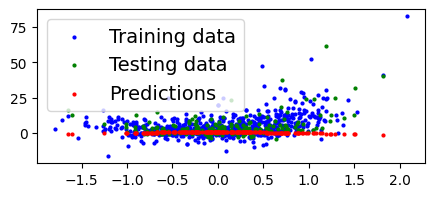

In [1277]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [1278]:
# y_preds=torch.tensor(y_preds)
# y_test=torch.tensor(y_test.to_numpy())
print(f"Loss in one parameter before train: {y_preds[0] - y_test[0]}")

Loss in one parameter before train: -2.7456872128941563


In [1279]:
optimizer =optim.SGD(model3.parameters(),lr=0.001)

In [1280]:
# X_train = torch.tensor(X_train)
# y_train=torch.tensor(y_train)
epochs_count, train_loss, test_loss = train(model3,X_train,y_train, X_test,y_test,loss_function,optimizer,epochs=1000)

Epoch 0: MAE Loss: 5.01 | Test Loss: 4.63
Epoch 10: MAE Loss: 5.01 | Test Loss: 4.63
Epoch 20: MAE Loss: 5.01 | Test Loss: 4.63
Epoch 30: MAE Loss: 5.00 | Test Loss: 4.62
Epoch 40: MAE Loss: 5.00 | Test Loss: 4.62
Epoch 50: MAE Loss: 5.00 | Test Loss: 4.62
Epoch 60: MAE Loss: 5.00 | Test Loss: 4.62
Epoch 70: MAE Loss: 4.99 | Test Loss: 4.61
Epoch 80: MAE Loss: 4.99 | Test Loss: 4.61
Epoch 90: MAE Loss: 4.99 | Test Loss: 4.61
Epoch 100: MAE Loss: 4.99 | Test Loss: 4.60
Epoch 110: MAE Loss: 4.98 | Test Loss: 4.60
Epoch 120: MAE Loss: 4.98 | Test Loss: 4.60
Epoch 130: MAE Loss: 4.98 | Test Loss: 4.60
Epoch 140: MAE Loss: 4.98 | Test Loss: 4.59
Epoch 150: MAE Loss: 4.97 | Test Loss: 4.59
Epoch 160: MAE Loss: 4.97 | Test Loss: 4.59
Epoch 170: MAE Loss: 4.97 | Test Loss: 4.58
Epoch 180: MAE Loss: 4.97 | Test Loss: 4.58
Epoch 190: MAE Loss: 4.96 | Test Loss: 4.58
Epoch 200: MAE Loss: 4.96 | Test Loss: 4.58
Epoch 210: MAE Loss: 4.96 | Test Loss: 4.57
Epoch 220: MAE Loss: 4.96 | Test Loss: 4.57

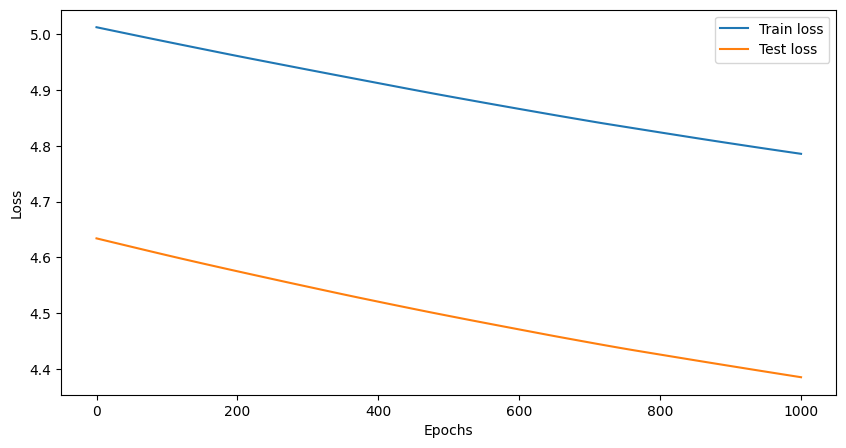

In [1281]:
plot_stats(epochs_count, train_loss, test_loss)

In [1282]:
y_preds = predict(model3, X_test)

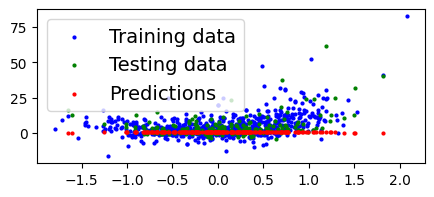

In [1283]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [1284]:
print(f"Loss in one parameter after train: {y_preds[0] - y_test[0]}")

Loss in one parameter after train: -2.3596249824267037



# **Model 4 (polynomial regression)**

In [1285]:
data_copy=data.copy()
X=data_copy['x4']
y=data_copy['y']

In [1286]:
X_train,y_train=X[:splitter],y[:splitter]
X_test,y_test=X[splitter:],y[splitter:]
X_test=torch.tensor(X_test.to_numpy())
y_test=torch.tensor(y_test.to_numpy())
X_train=torch.tensor(X_train.to_numpy())
y_train=torch.tensor(y_train.to_numpy())

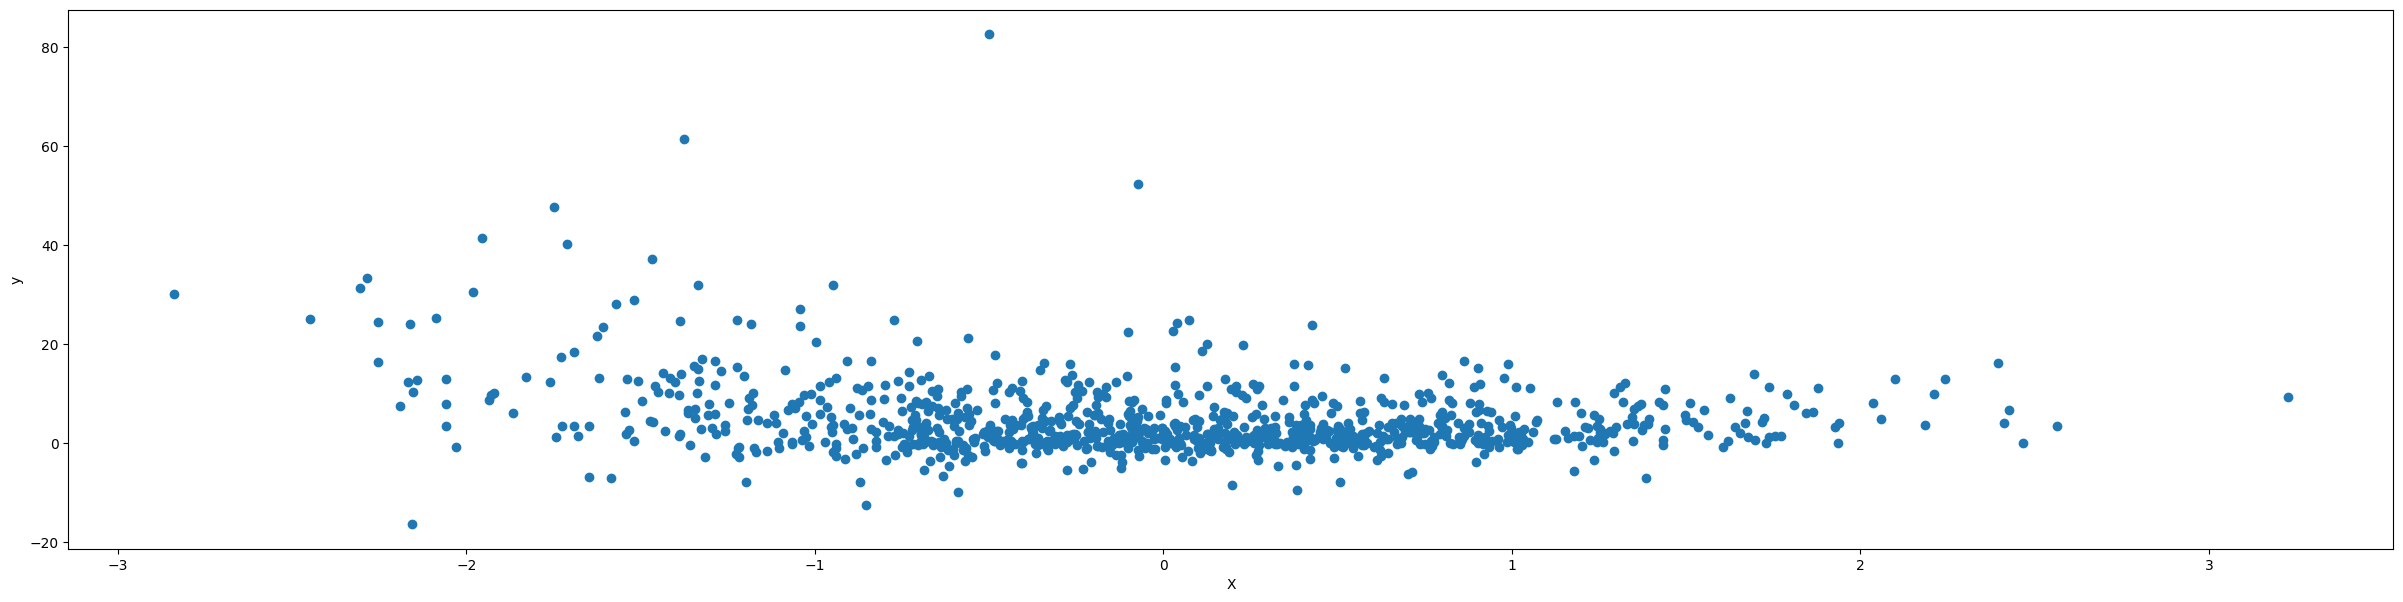

In [1287]:
show(X,y)


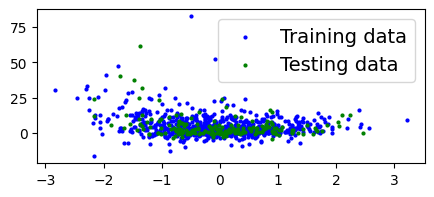

In [1288]:
plot_predictions(X_train,y_train,X_test,y_test)

In [1289]:
model4=polynomial_second()

In [1290]:
y_preds=predict(model4,X_test)


In [1291]:
print (f"the loss in one parameter before train ={y_preds[0]-y_test[0]} ")

the loss in one parameter before train =-2.893925720919377 


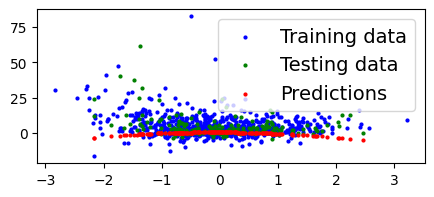

In [1292]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [1293]:
optimizer=optim.SGD(model4.parameters(),lr=0.001)

In [1294]:
epochs_count,train_loss,test_loss=train(model4,X_train,y_train,X_test,y_test,loss_function,optimizer,epochs=1000)

Epoch 0: MAE Loss: 5.39 | Test Loss: 5.03
Epoch 10: MAE Loss: 5.38 | Test Loss: 5.03
Epoch 20: MAE Loss: 5.37 | Test Loss: 5.02
Epoch 30: MAE Loss: 5.37 | Test Loss: 5.01
Epoch 40: MAE Loss: 5.36 | Test Loss: 5.00
Epoch 50: MAE Loss: 5.35 | Test Loss: 5.00
Epoch 60: MAE Loss: 5.35 | Test Loss: 4.99
Epoch 70: MAE Loss: 5.34 | Test Loss: 4.98
Epoch 80: MAE Loss: 5.34 | Test Loss: 4.97
Epoch 90: MAE Loss: 5.33 | Test Loss: 4.97
Epoch 100: MAE Loss: 5.32 | Test Loss: 4.96
Epoch 110: MAE Loss: 5.32 | Test Loss: 4.95
Epoch 120: MAE Loss: 5.31 | Test Loss: 4.95
Epoch 130: MAE Loss: 5.31 | Test Loss: 4.94
Epoch 140: MAE Loss: 5.30 | Test Loss: 4.93
Epoch 150: MAE Loss: 5.29 | Test Loss: 4.93
Epoch 160: MAE Loss: 5.29 | Test Loss: 4.92
Epoch 170: MAE Loss: 5.28 | Test Loss: 4.91
Epoch 180: MAE Loss: 5.28 | Test Loss: 4.91
Epoch 190: MAE Loss: 5.27 | Test Loss: 4.90
Epoch 200: MAE Loss: 5.26 | Test Loss: 4.89
Epoch 210: MAE Loss: 5.26 | Test Loss: 4.89
Epoch 220: MAE Loss: 5.25 | Test Loss: 4.88

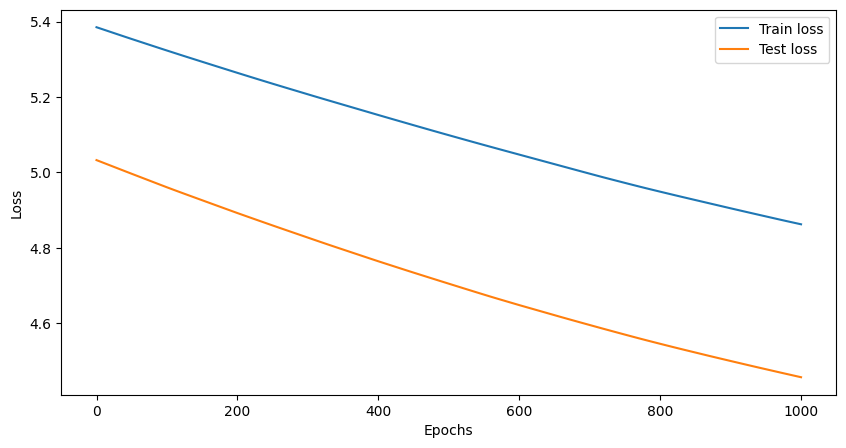

In [1295]:
plot_stats(epochs_count,train_loss,test_loss)


In [1296]:
y_preds=predict(model4,X_test)

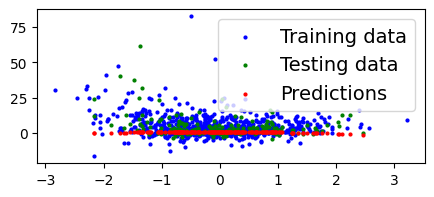

In [1297]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [1298]:
print (f"the loss in one parameter after train ={y_preds[0]-y_test[0]} ")

the loss in one parameter after train =-2.369505431317496 


# **Model 5 (linear regression)**

In [1299]:
data_copy = data.copy()
X = data_copy['x5']
y = data_copy['y']

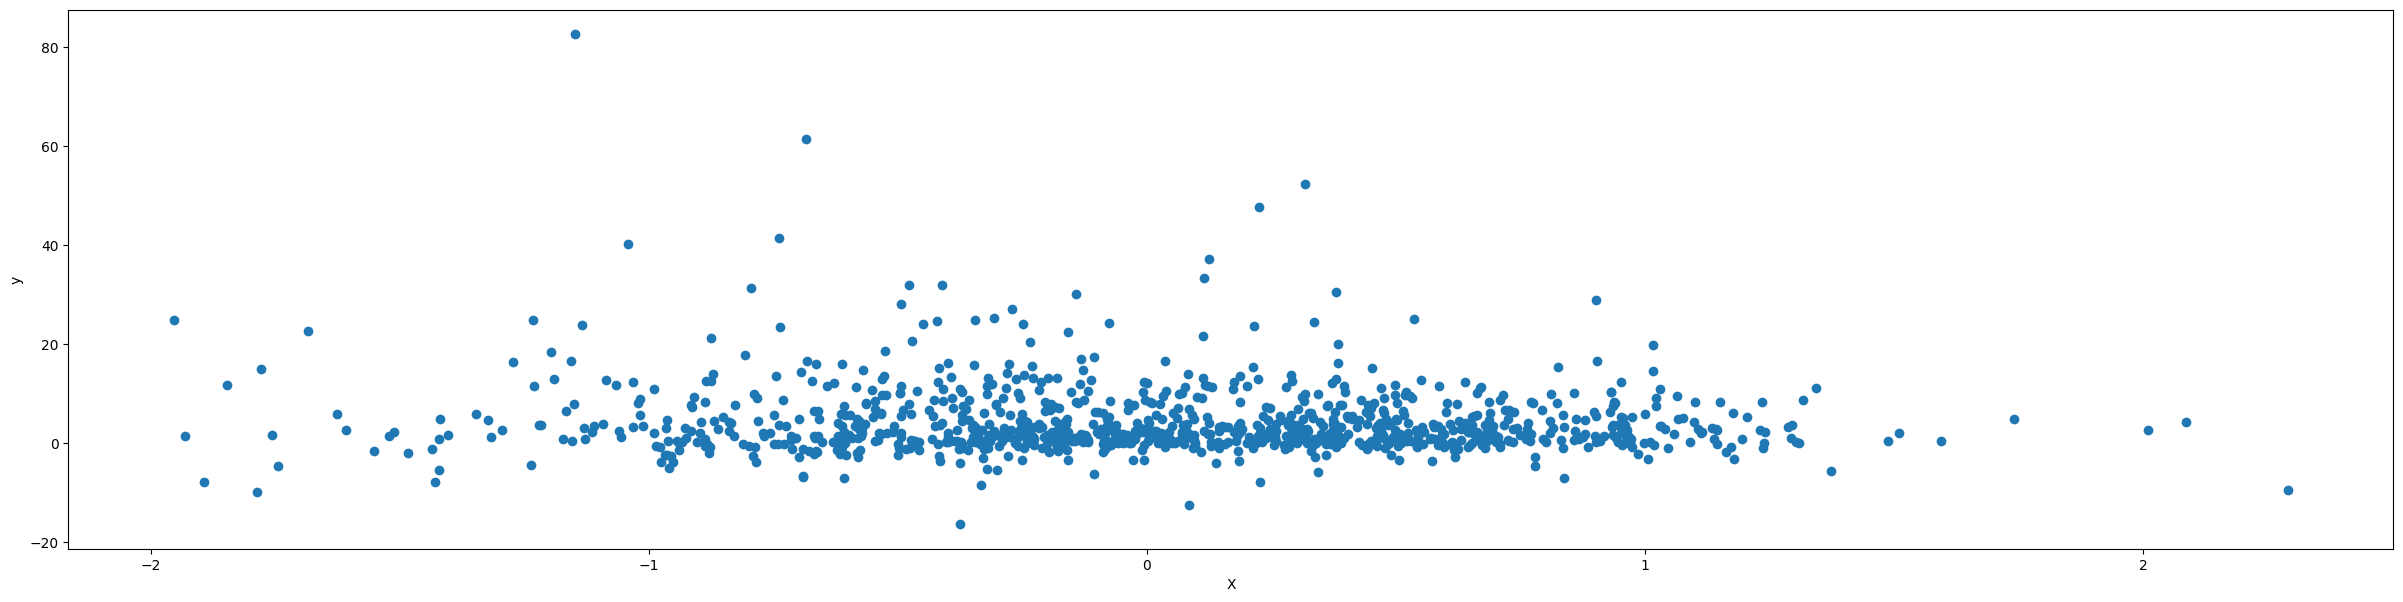

In [1300]:
show(X,y)

In [1301]:

X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]
X_test=torch.tensor(X_test.to_numpy())
y_test=torch.tensor(y_test.to_numpy())
X_train=torch.tensor(X_train.to_numpy())
y_train=torch.tensor(y_train.to_numpy())

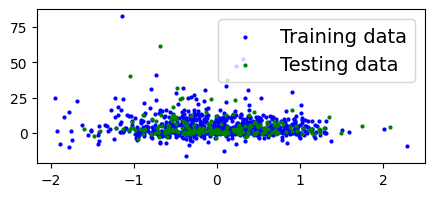

In [1302]:
plot_predictions(X_train, y_train,X_test, y_test)

In [1303]:
model5= LinearRegressionModel()


In [1304]:
y_preds=predict(model5,X_test)

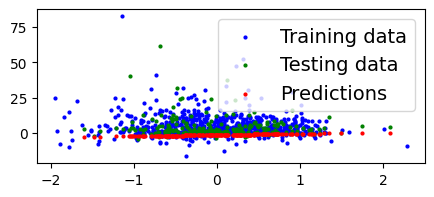

In [1305]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [1306]:

print(f"Loss in one parameter before train: {y_preds[0] - y_test[0]}")

Loss in one parameter before train: -4.24789204560749


In [1307]:
optimizer = torch.optim.SGD(model5.parameters(),lr=0.0001)

In [1308]:
# X_train = torch.tensor(X_train)
# y_train=torch.tensor(y_train)
# X_test = torch.tensor(X_test)
epochs_count, train_loss, test_loss = train( model5,X_train,y_train,X_test,y_test,loss_function,optimizer,  epochs=5000)

Epoch 0: MAE Loss: 6.16 | Test Loss: 5.93
Epoch 10: MAE Loss: 6.16 | Test Loss: 5.93
Epoch 20: MAE Loss: 6.16 | Test Loss: 5.93
Epoch 30: MAE Loss: 6.16 | Test Loss: 5.92
Epoch 40: MAE Loss: 6.16 | Test Loss: 5.92
Epoch 50: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 60: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 70: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 80: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 90: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 100: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 110: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 120: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 130: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 140: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 150: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 160: MAE Loss: 6.15 | Test Loss: 5.92
Epoch 170: MAE Loss: 6.15 | Test Loss: 5.91
Epoch 180: MAE Loss: 6.15 | Test Loss: 5.91
Epoch 190: MAE Loss: 6.15 | Test Loss: 5.91
Epoch 200: MAE Loss: 6.14 | Test Loss: 5.91
Epoch 210: MAE Loss: 6.14 | Test Loss: 5.91
Epoch 220: MAE Loss: 6.14 | Test Loss: 5.91

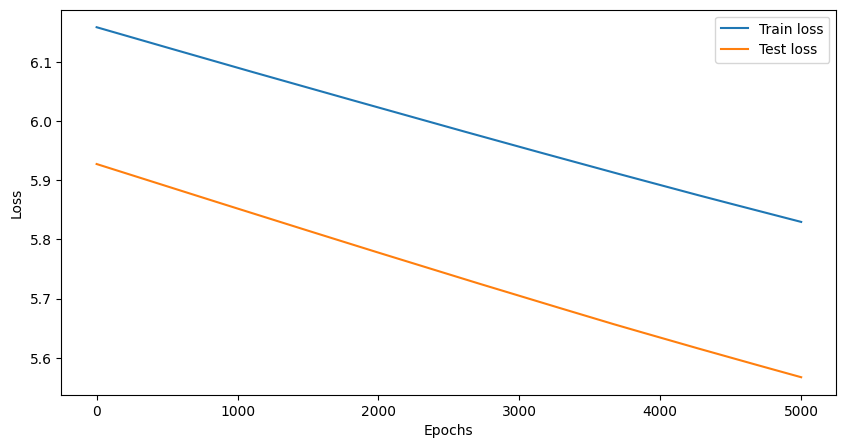

In [1309]:
plot_stats(epochs_count, train_loss, test_loss)

In [1310]:
y_preds = predict(model5, X_test)

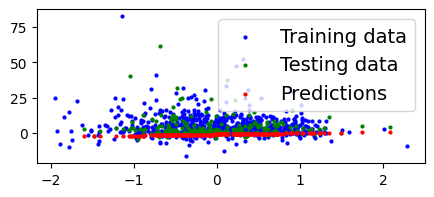

In [1311]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [1312]:
print(f"Loss in one parameter after train: {y_preds[0] - y_test[0]}")

Loss in one parameter after train: -3.8361199286788854
